In [172]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as mplot
import numpy as np

# set options
pd.options.display.float_format = '{:20,.2f}'.format

# Data files for analysis
mouse_meta_data_file = "Data/mouse_metadata.csv"
mouse_study_results_file = "Data/study_results.csv"

#Read data files
mouse_meta_data_df = pd.read_csv(mouse_meta_data_file)
mouse_study_results_df = pd.read_csv(mouse_study_results_file)

#Remove Mouse with duplicate time points
mouse_study_results_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)

#merge meta data with study results
mouse_meta_study_df = pd.merge(mouse_study_results_df, mouse_meta_data, how="left", on=["Mouse ID"])

mouse_meta_study_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,f932,0,45.00,0,Ketapril,Male,15,29
2,g107,0,45.00,0,Ketapril,Female,2,29
3,a457,0,45.00,0,Ketapril,Female,11,30
4,c819,0,45.00,0,Ketapril,Male,21,25


In [173]:
#Generate summary statistics for each drug regimen
drug_regimen_df = mouse_meta_study_df.groupby(['Drug Regimen'])

drug_regimen_stats_df = pd.DataFrame({
    "Tumor Volume[mean]": drug_regimen_df["Tumor Volume (mm3)"].mean(),    
    "Tumor Volume[median]": drug_regimen_df["Tumor Volume (mm3)"].median(),
    "Tumor Volume[Variance]": drug_regimen_df["Tumor Volume (mm3)"].var(),
    "Tumor Volume[std]": drug_regimen_df["Tumor Volume (mm3)"].std(),
    "Tumor Volume[sem]": drug_regimen_df["Tumor Volume (mm3)"].sem(),
})

drug_regimen_stats_df

,Tumor Volume[mean],Tumor Volume[median],Tumor Volume[Variance],Tumor Volume[std],Tumor Volume[sem]
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


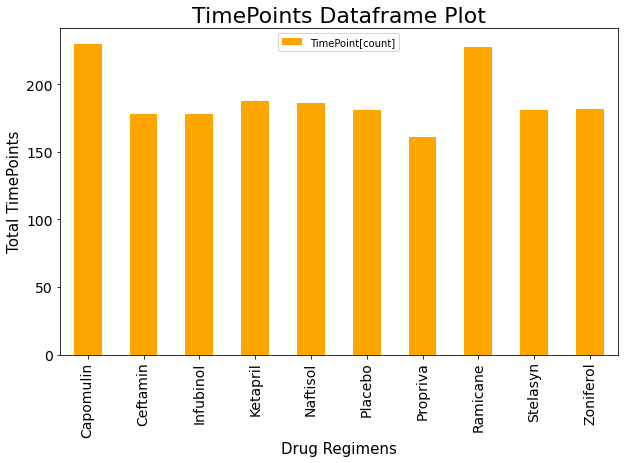

In [174]:
# Generate bar plot for each drug regimen vs total number of time points 
drug_regimen_timepoint_df = pd.DataFrame({
    "TimePoint[count]":drug_regimen_df["Timepoint"].count()
})

df_axis = drug_regimen_timepoint_df.plot(kind='bar', title='TimePoints Dataframe Plot', ylabel='Total Timepoints',
         xlabel='Drug Regimen', figsize=(10, 6), color='orange', fontsize=14)
df_axis.set_title("TimePoints Dataframe Plot", fontsize=22)
df_axis.set_ylabel("Total TimePoints", fontsize=15);
df_axis.set_xlabel("Drug Regimens", fontsize=15);

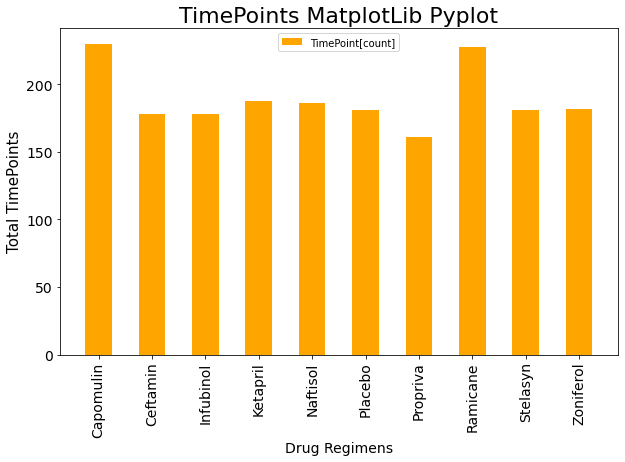

In [175]:
# Generate bar plot [Pyplot] for each drug regimen vs total number of time points 

#drug_regimen_names = drug_regimen_df.groups.keys()
drug_regimen_names = [name for name, temp_df in drug_regimen_df ]
total_timepoints = drug_regimen_df['Timepoint'].count()

#chart = mplot.figure()
chart, axis = mplot.subplots(figsize=(10,6))
#axis = chart.add_axes([0,0,1,1])
axis.bar(drug_regimen_names, total_timepoints, color='orange', label='TimePoint[count]', width=0.5)
axis.set_title("TimePoints MatplotLib Pyplot", fontsize=22)
axis.set_ylabel("Total TimePoints", fontsize=15);
axis.set_xlabel("Drug Regimens", fontsize=14);
axis.legend(loc='upper center')
mplot.xticks(rotation=90, fontsize=14)
mplot.yticks(fontsize=14)
mplot.show()

In [219]:
drug_regimen_mouse_df = mouse_meta_study_df.groupby(['Drug Regimen', 'Mouse ID'], as_index=False)

drug_regimen_mouse_max_timepoint = drug_regimen_mouse_df['Timepoint'].max()

drug_regimen_mouse_final_tumor_volume_df = pd.merge(drug_regimen_mouse_max_timepoint,mouse_meta_study_df,how='inner',on=['Drug Regimen', 'Mouse ID', 'Timepoint'])

drug_regimen_mouse_final_tumor_volume_df = drug_regimen_mouse_final_tumor_volume_df[[
    'Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)'
]]



promising_treatment_regimens = [
    'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_regimen_mouse_final_tumor_volume_df = drug_regimen_mouse_final_tumor_volume_df[
    drug_regimen_mouse_final_tumor_volume_df['Drug Regimen'].isin(
    promising_treatment_regimens)
]

drug_regimen_mouse_final_tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Weight (g)
0,Capomulin,b128,45,38.98,22
1,Capomulin,b742,45,38.94,21
2,Capomulin,f966,20,30.49,17
3,Capomulin,g288,45,37.07,19
4,Capomulin,g316,45,40.16,22
...,...,...,...,...,...
195,Ramicane,s508,45,30.28,17
196,Ramicane,u196,45,40.67,25
197,Ramicane,w678,5,43.17,24
198,Ramicane,y449,15,44.18,24


In [220]:
tumor_volumes = drug_regimen_mouse_final_tumor_volume_df['Tumor Volume (mm3)']
quartiles = tumor_volumes.quantile([.25,.5,.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1

print("\n -- Upper Quartile, Lower Quartile & Inter Quartile Range -- \n")
print(f"The lower quartile of Tumor Volume (mm3) is: {Q1}")
print(f"The upper quartile of Tumor Volume (mm3) is: {Q3}")
print(f"The interquartile range of Tumor Volume (mm3) is: {IQR}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print("\n -- Outliers -- \n")
print(f"Values below {lower_range} could be outliers.")
print(f"Values above {upper_range} could be outliers.")


 -- Upper Quartile, Lower Quartile & Inter Quartile Range -- 

The lower quartile of Tumor Volume (mm3) is: 37.187743802499995
The upper quartile of Tumor Volume (mm3) is: 59.930261755000004
The interquartile range of Tumor Volume (mm3) is: 22.74251795250001
The the median of Tumor Volume (mm3) is: 45.0 

 -- Outliers -- 

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


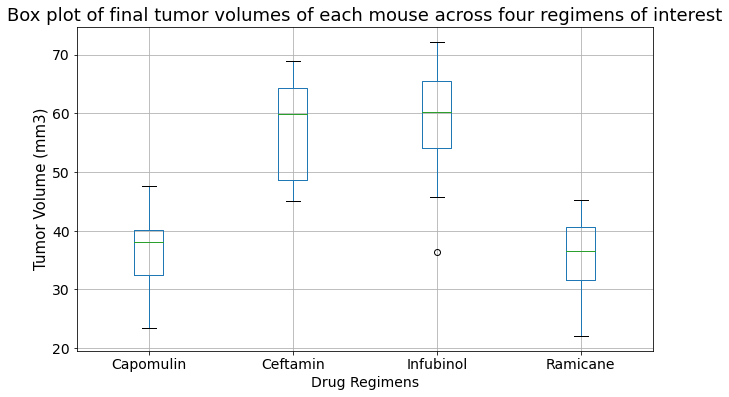

In [221]:
drug_tumor_Volume_df = drug_regimen_mouse_final_tumor_volume_df[['Drug Regimen', 'Tumor Volume (mm3)']]
#drug_tumor_Volume_df

#graph, graph_axes = mplot.subplots(ncols=4, figsize=(12, 5), sharey=True)
#drug_tumor_Volume_df.boxplot(by='Drug Regimen', return_type='axes', ax=graph_axes)

graph, graph_axes = mplot.subplots(figsize=(10,6))
drug_tumor_Volume_df.boxplot(by='Drug Regimen', widths=0.2, ax=graph_axes)
graph_axes.set_title("Box plot of final tumor volumes of each mouse across four regimens of interest", fontsize=18)
graph_axes.set_ylabel("Tumor Volume (mm3)", fontsize=15);
graph_axes.set_xlabel("Drug Regimens", fontsize=14);

graph.suptitle('')
mplot.xticks(fontsize=14)
mplot.yticks(fontsize=14)
mplot.show()

#drug_tumor_Volume_df.iloc[:,:].values

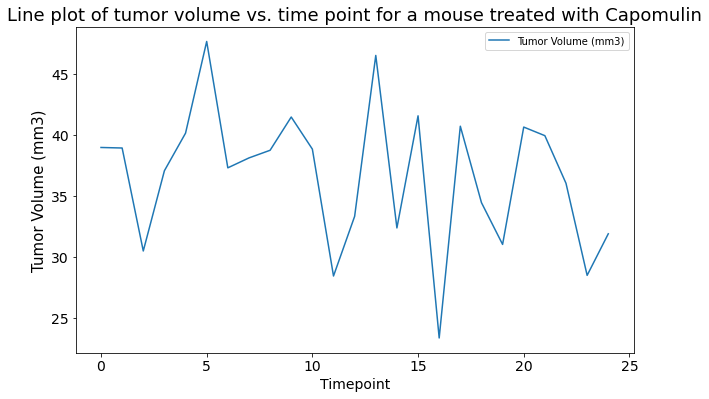

In [222]:
graph, graph_axes = mplot.subplots(figsize=(10,6))
Capmoulin_tumor_volume_vs_timepoint_df = drug_tumor_Volume_df[drug_tumor_Volume_df["Drug Regimen"] == 'Capomulin']
Capmoulin_tumor_volume_vs_timepoint_df.plot(ax=graph_axes)
graph_axes.set_title("Line plot of tumor volume vs. time point for a mouse treated with Capomulin", fontsize=18)
graph_axes.set_ylabel("Tumor Volume (mm3)", fontsize=15);
graph_axes.set_xlabel("Timepoint", fontsize=14);
mplot.xticks(fontsize=14)
mplot.yticks(fontsize=14)
mplot.show()

In [239]:
drug_regimen_mouse_df = mouse_meta_study_df.groupby(['Drug Regimen', 'Mouse ID'])
Capmoulin_avg_tumor_volume_vs_mouse_wt_df = pd.DataFrame({
    "Average Tumor Volume (mm3)": drug_regimen_mouse_df["Weight (g)"].mean()
})


In [242]:
#drug_tumor_Volume_df = drug_regimen_mouse_final_tumor_volume_df[['Drug Regimen', 'Tumor Volume (mm3)' 'Weight (g)']]

#graph, graph_axes = mplot.subplots(figsize=(10,6))
#Capmoulin_tumor_volume_vs_timepoint_df = drug_tumor_Volume_df[drug_tumor_Volume_df["Drug Regimen"] == 'Capomulin']


#Capmoulin_tumor_volume_vs_timepoint_df.plot(ax=graph_axes)
#graph_axes.set_title("Line plot of tumor volume vs. time point for a mouse treated with Capomulin", fontsize=18)
#graph_axes.set_ylabel("Tumor Volume (mm3)", fontsize=15);
#graph_axes.set_xlabel("Timepoint", fontsize=14);
#mplot.xticks(fontsize=14)
#mplot.yticks(fontsize=14)
#mplot.show()